<h1>Visualisations simples (25%)</h1>

In [1]:
import sys
sys.path.append('../..')
import ift6758
from ift6758.controller.nhl_data_downloader  import NHLDataDownloader, get_dataframe_from_csv_file, get_dataframe_from_concatenated_csv_files


<h1>Question 1.)</h1>

In [2]:
df_2016 = get_dataframe_from_concatenated_csv_files(2016)
df_2016

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2016020518,2016-12-27,1,01:09,55,shot-on-goal,False,backhand,85.0,8.0,15,Capitals,away,False,Equal Strength,5v5,1551,8471698,8470860
1,1,2016020518,2016-12-27,1,02:38,58,shot-on-goal,False,tip-in,-71.0,-4.0,2,Islanders,home,False,Equal Strength,5v5,1551,8475754,8474651
2,2,2016020518,2016-12-27,1,03:44,61,shot-on-goal,False,slap,-36.0,29.0,2,Islanders,home,False,Equal Strength,5v5,1551,8470187,8474651
3,3,2016020518,2016-12-27,1,04:12,64,shot-on-goal,False,wrist,-70.0,3.0,2,Islanders,home,False,Equal Strength,5v5,1551,8473504,8474651
4,4,2016020518,2016-12-27,1,04:21,67,shot-on-goal,False,tip-in,-72.0,3.0,2,Islanders,home,False,Equal Strength,5v5,1551,8476458,8474651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80394,55,2016020927,2017-02-28,4,03:32,756,shot-on-goal,False,slap,76.0,-2.0,13,Panthers,home,False,Equal Strength,3v3,1331,8476456,8470320
80395,56,2016020927,2017-02-28,5,00:00,677,goal,True,backhand,-81.0,5.0,13,Panthers,home,False,Power Play,1v0,1010,Unknown,8470320
80396,57,2016020927,2017-02-28,5,00:00,678,shot-on-goal,False,backhand,83.0,6.0,12,Hurricanes,away,False,Penalty Kill,0v1,101,8470740,8466141
80397,58,2016020927,2017-02-28,5,00:00,679,shot-on-goal,False,slap,-82.0,5.0,13,Panthers,home,False,Power Play,1v0,1010,8476389,8470320


In [3]:
pivott_df_2016 = df_2016.pivot_table(index='shot_type', columns='is_goal', aggfunc='size', fill_value=0)
pivott_df_2016


is_goal,False,True
shot_type,,
Unknown,6,0
backhand,5862,698
deflected,806,199
slap,12691,829
snap,11561,1172
tip-in,3267,713
wrap-around,773,70
wrist,38056,3696


In [5]:
pivot_df_2016 = pivott_df_2016.rename(columns={False: 'tir_bloqué', True: 'tir_marqué'})
pivot_df_2016

is_goal,tir_bloqué,tir_marqué
shot_type,,
Unknown,6,0
backhand,5862,698
deflected,806,199
slap,12691,829
snap,11561,1172
tip-in,3267,713
wrap-around,773,70
wrist,38056,3696


In [6]:
pivot_df_2016 = pivot_df_2016.drop(index=["Unknown"])
pivot_df_2016

is_goal,tir_bloqué,tir_marqué
shot_type,,
backhand,5862,698
deflected,806,199
slap,12691,829
snap,11561,1172
tip-in,3267,713
wrap-around,773,70
wrist,38056,3696


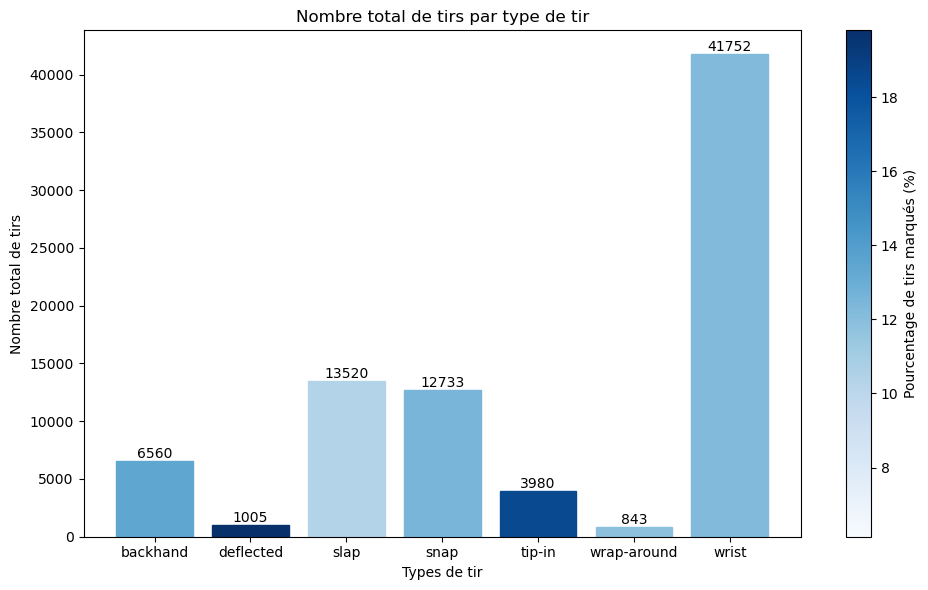

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre total de tirs
pivot_df_2016['total_tirs'] = pivot_df_2016['tir_bloqué'] + pivot_df_2016['tir_marqué']

# Calculer le pourcentage de tirs marqués
pivot_df_2016['pourcentage_marqué'] = pivot_df_2016['tir_marqué'] / (pivot_df_2016['tir_bloqué'] + pivot_df_2016['tir_marqué']) * 100

# Créer l'histogramme
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_df_2016.index, pivot_df_2016['total_tirs'], color='blue', alpha=1)

# Créer une couleur pour chaque barre en fonction du pourcentage de tirs marqués
colors = plt.cm.Blues(pivot_df_2016['pourcentage_marqué'] / pivot_df_2016['pourcentage_marqué'].max())

# Mettre à jour les barres avec la couleur correspondante
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Créer un ScalarMappable pour la colorbar
norm = plt.Normalize(pivot_df_2016['pourcentage_marqué'].min(), pivot_df_2016['pourcentage_marqué'].max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Pour éviter un avertissement

# Ajouter la colorbar avec l'argument ax
cbar = plt.colorbar(sm, ax=plt.gca(), label='Pourcentage de tirs marqués (%)')

# Ajouter des labels et un titre
plt.xlabel('Types de tir')
plt.ylabel('Nombre total de tirs')
plt.title('Nombre total de tirs par type de tir')

# Afficher les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval}", ha='center', va='bottom')

plt.tight_layout()  # Pour un ajustement automatique des éléments
plt.show()


<h1>Questions 1a 1b et 1c </h1>

Il s'agit ici de l'analyse statistique qui nous a permis de savoir où se trouve chaque type d'équipe à chaque période du match

In [8]:
filtered_df_2016 = df_2016[(df_2016['game_id'] == 2016020922) & (df_2016['period'] ==1 )& (df_2016['team_type'] =="home" )]
filtered_df_2016

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
37785,0,2016020922,2017-02-28,1,01:54,57,shot-on-goal,False,snap,73.0,-23.0,6,Bruins,home,False,Equal Strength,5v5,1551,8474062,8469608
37787,2,2016020922,2017-02-28,1,03:06,61,goal,True,wrist,62.0,5.0,6,Bruins,home,False,Equal Strength,5v5,1551,Unknown,8469608
37788,3,2016020922,2017-02-28,1,05:46,68,shot-on-goal,False,wrist,75.0,3.0,6,Bruins,home,False,Equal Strength,5v5,1551,8468575,8469608
37791,6,2016020922,2017-02-28,1,12:12,78,shot-on-goal,False,wrist,71.0,-17.0,6,Bruins,home,False,Equal Strength,5v5,1551,8478366,8469608
37792,7,2016020922,2017-02-28,1,12:21,80,shot-on-goal,False,backhand,77.0,4.0,6,Bruins,home,False,Equal Strength,5v5,1551,8465009,8469608
37795,10,2016020922,2017-02-28,1,13:51,85,shot-on-goal,False,wrist,48.0,-29.0,6,Bruins,home,False,Equal Strength,5v5,1551,8470638,8469608
37797,12,2016020922,2017-02-28,1,18:31,97,shot-on-goal,False,slap,7.0,35.0,6,Bruins,home,False,Penalty Kill,4v5,1541,8476191,8469608
37798,13,2016020922,2017-02-28,1,18:57,99,shot-on-goal,False,wrist,73.0,17.0,6,Bruins,home,False,Penalty Kill,4v5,1541,8468575,8469608


In [9]:
stat = filtered_df_2016.describe()
stat

,Unnamed: 0,game_id,period,event_id,x_coord,y_coord,event_owner_team_id,situation_code
count,8.000000,8.000000e+00,8.0,8.000000,8.000000,8.000000,8.0,8.0000
mean,6.625000,2.016021e+09,1.0,78.125000,60.750000,-0.625000,6.0,1548.5000
std,4.779047,0.000000e+00,0.0,15.514394,23.680915,21.447194,0.0,4.6291
min,0.000000,2.016021e+09,1.0,57.000000,7.000000,-29.000000,6.0,1541.0000
25%,2.750000,2.016021e+09,1.0,66.250000,58.500000,-18.500000,6.0,1548.5000
50%,6.500000,2.016021e+09,1.0,79.000000,72.000000,3.500000,6.0,1551.0000
75%,10.500000,2.016021e+09,1.0,88.000000,73.500000,8.000000,6.0,1551.0000
max,13.000000,2.016021e+09,1.0,99.000000,77.000000,35.000000,6.0,1551.0000


C'est la fin de la petite analyse statistiques, des explications seront apportées dans le blog

In [10]:
import pandas as pd
from scipy.spatial import distance

def add_home_goalie_position(df: pd.DataFrame) -> pd.DataFrame:
    df["home_goalie_position_first_period"] = "right"
    number_of_lines = df.shape[0]
    games_ids = []
    home_goalie_positions_first_period = {}
    
    for index in range(number_of_lines):
        game_id = df.loc[index, "game_id"]
        if game_id in games_ids:
            df.loc[index, "home_goalie_position_first_period"] = home_goalie_positions_first_period[game_id]
        else:
            filtered_df = df.query(f"game_id == {game_id}")
            number_of_positive = filtered_df.query("team_type == 'home' and period == 1 and x_coord > 0").shape[0]
            number_of_negative = filtered_df.query("team_type == 'home' and period == 1 and x_coord <= 0").shape[0]
            if number_of_positive > number_of_negative:
                df.loc[index, "home_goalie_position_first_period"] = "left"
                home_goalie_positions_first_period[game_id] = "left"
            else:
                df.loc[index, "home_goalie_position_first_period"] = "right"
                home_goalie_positions_first_period[game_id] = "right"
            games_ids.append(game_id)
    
    return df

def distance_de_tir(tir: pd.DataFrame) -> float:
    if tir["home_goalie_position_first_period"] == "right":
        if tir["period"] % 2 == 1:
            goal_home = [100, 0]
            goal_away = [-100, 0]
        else:
            goal_home = [-100, 0]
            goal_away = [100, 0]
    else:
        if tir["period"] % 2 == 1:
            goal_home = [-100, 0]
            goal_away = [100, 0]
        else:
            goal_home = [100, 0]
            goal_away = [-100, 0]
        
    if tir["team_type"] == "away":
        return distance.euclidean((tir["x_coord"], tir["y_coord"]), goal_home)
    else:
        return distance.euclidean((tir["x_coord"], tir["y_coord"]), goal_away)

def pipeline_home_goalie_position_and_distance_de_tir(df: pd.DataFrame) -> pd.DataFrame:
    # Étape 1: Ajouter la colonne home_goalie_position_first_period
    df = add_home_goalie_position(df)
    
    # Etape 2: Supprimer les lignes avec des valeurs manquantes dans x_coord et y_coord
    df = df.dropna(subset=['x_coord', 'y_coord'])  # Suppression des lignes insignifiantes
    
    # Étape 3: Ajouter la colonne distance_de_tir
    df["distance_de_tir"] = df.apply(distance_de_tir, axis=1)
    
    return df

In [11]:
# Utilisation de la pipeline sur le DataFrame df_2019
df_2016 = pipeline_home_goalie_position_and_distance_de_tir(df_2016)
df_2016.head(3)

/tmp/ipykernel_6566/2633824581.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distance_de_tir"] = df.apply(distance_de_tir, axis=1)


,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_goalie_position_first_period,distance_de_tir
0,0,2016020518,2016-12-27,1,01:09,55,shot-on-goal,False,backhand,85.0,...,Capitals,away,False,Equal Strength,5v5,1551,8471698,8470860,right,17.000000
1,1,2016020518,2016-12-27,1,02:38,58,shot-on-goal,False,tip-in,-71.0,...,Islanders,home,False,Equal Strength,5v5,1551,8475754,8474651,right,29.274562
2,2,2016020518,2016-12-27,1,03:44,61,shot-on-goal,False,slap,-36.0,...,Islanders,home,False,Equal Strength,5v5,1551,8470187,8474651,right,70.263789


__Relation entre la distance à laquelle un tir a été effectué et la chance qu'il s'agisse d'un but__

/tmp/ipykernel_6566/667937452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['is_goal_level'] = df_2016['is_goal'].apply(lambda x: 1 if x else -1)


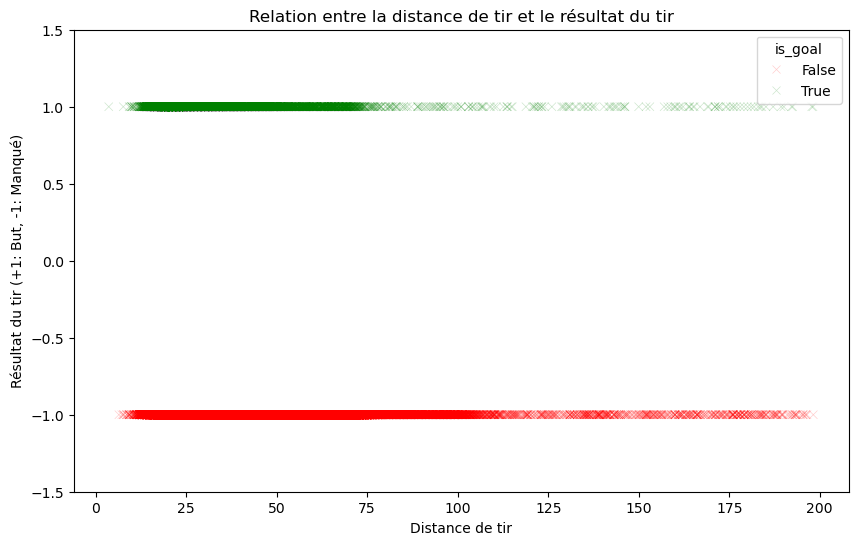

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une nouvelle colonne pour les niveaux : +1 pour les buts, -1 pour les tirs manqués
df_2016['is_goal_level'] = df_2016['is_goal'].apply(lambda x: 1 if x else -1)

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2016, x='distance_de_tir', y='is_goal_level', hue='is_goal', 
                palette={True: 'green', False: 'red'}, alpha=0.2, marker='x')

# Ajouter des titres et des labels
plt.title("Relation entre la distance de tir et le résultat du tir")
plt.xlabel("Distance de tir")
plt.ylabel("Résultat du tir (+1: But, -1: Manqué)")

# Ajuster les limites de l'axe y
plt.ylim(-1.5, 1.5)

# Afficher le graphique
plt.show()


Ce graphe nous montre clairement que plus la distance de tir est proche du goal adverse et plus on a de chance de mettre un but car comme on peut le voir la majorité des buts sont mis à moins de 78 pieds environ du goal adverse. Cependant aucune distribution n'est visible sur ce graphe pour autant. Sauf peut etre celle des tirs_ratés qui semble etre plutôt uniforme mais moins dense quand on séloigne du goal adverse.
Nous allons donc tracer des histogrames pour voir si il se dessines des scenarios plus parlants.

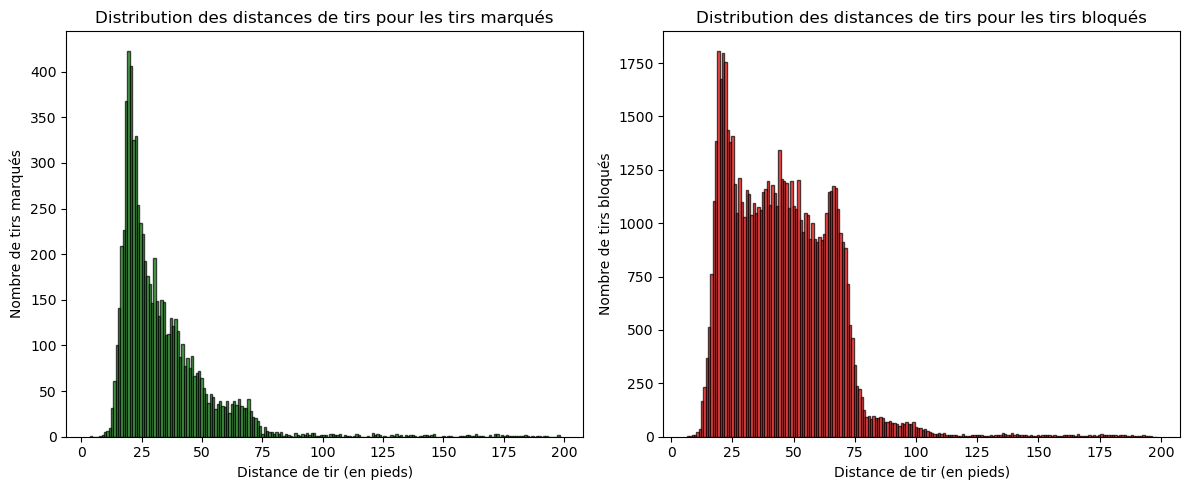

In [13]:
is_goal_df_2016 = df_2016.query("is_goal == True")
no_goal_df_2016 = df_2016.query("is_goal == False")

# Créer une figure avec deux sous-figures (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes

# Premier histogramme dans la première sous-figure (axes[0])
axes[0].hist(is_goal_df_2016["distance_de_tir"], bins=200, color="green", alpha=0.7, edgecolor="black") # TODO: trouver une méthode pour déterminer la valeur de bins
axes[0].set_title("Distribution des distances de tirs pour les tirs marqués")
axes[0].set_xlabel("Distance de tir (en pieds)")
axes[0].set_ylabel("Nombre de tirs marqués")

# Deuxième histogramme dans la deuxième sous-figure (axes[1])
axes[1].hist(no_goal_df_2016["distance_de_tir"], bins=200, color="red", alpha=0.7, edgecolor="black") # TODO: trouver une méthode pour déterminer la valeur de bins
axes[1].set_title("Distribution des distances de tirs pour les tirs bloqués")
axes[1].set_xlabel("Distance de tir (en pieds)")
axes[1].set_ylabel("Nombre de tirs bloqués")

# Ajuster l'espacement entre les sous-figures
plt.tight_layout()

# Afficher la figure avec les deux sous-figures
plt.show()

Nous pouvons voir ici des distributions presques normales mais étirée vers la gauche pour les tirs marqués et applaties pour les tirs ratés.
Nous allons passez à l'échelle logarithmique pour mieux visualiser et interpréter les données qui semble plutôt distribuées de manière asymétrique (ou "skewed") d'après le graphique. En effet, comme on peut le voir beaucoup trop de tirs qui ont lieu autour de 20 pieds ont fini par etre un but ce qui fait du premier quartile de cette distribution des valeurs très asymétriques.

**Echelle logarithmique**

In [14]:
import math
import matplotlib.pyplot as plt

def plot_shot_distance_histograms(df):
    # Filtrer les DataFrames pour les tirs marqués et non marqués
    is_goal_df = df.query("is_goal == True")
    no_goal_df = df.query("is_goal == False")

    # Créer une figure avec deux sous-figures (1 ligne, 2 colonnes)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes

    # Premier histogramme dans la première sous-figure (axes[0])
    axes[0].hist(is_goal_df["distance_de_tir"].apply(math.log), bins=200, color="green", alpha=0.7, edgecolor="black")
    axes[0].set_title("Distribution des distances de tirs pour les tirs marqués")
    axes[0].set_xlabel("Distance de tir (log en pieds)")
    axes[0].set_ylabel("Nombre de tirs marqués")

    # Deuxième histogramme dans la deuxième sous-figure (axes[1])
    axes[1].hist(no_goal_df["distance_de_tir"].apply(math.log), bins=200, color="red", alpha=0.7, edgecolor="black")
    axes[1].set_title("Distribution des distances de tirs pour les tirs bloqués")
    axes[1].set_xlabel("Distance de tir (log en pieds)")
    axes[1].set_ylabel("Nombre de tirs bloqués")

    # Ajuster l'espacement entre les sous-figures
    plt.tight_layout()

    # Afficher la figure avec les deux sous-figures
    plt.show()


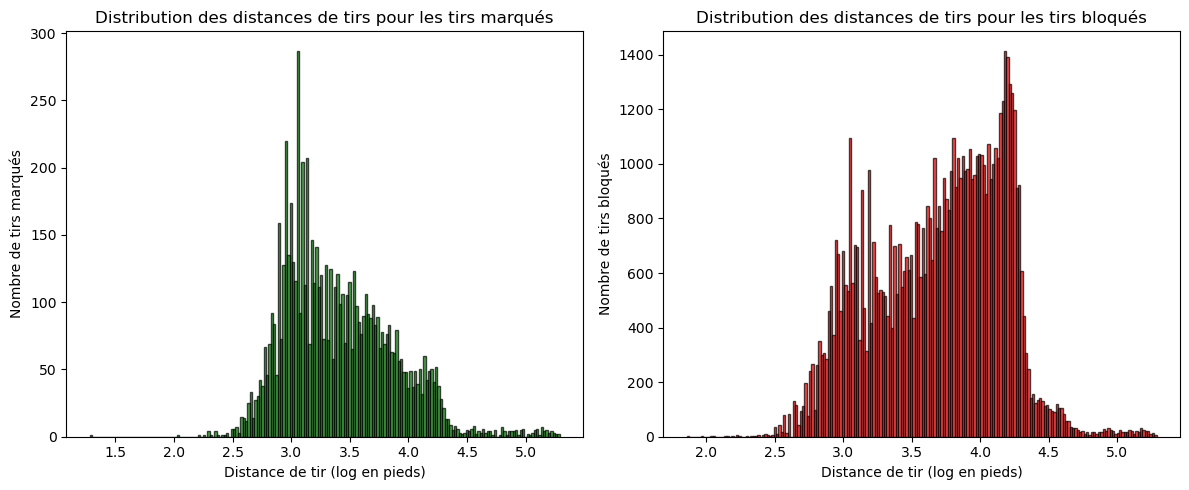

In [15]:
plot_shot_distance_histograms(df_2016)

In [30]:
import math 
moyenne_des_tirs_marqués = is_goal_df_2016["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2016["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

33.96023403635806
20.736991631131804


Ici nous pouvons voir que la distribution logarithmique des distances de tirs est normale (un peu bruité) dans les deux cas.
En fait faut pas tirer trop proche et biensûr pas tres loin non plus pour marquer des buts.
D'après cette distribution presque normale de parametres (33.9 , 20.74) nous pouvons donc évaluer les probabilités qu'un tir finisse par un but. Très rapidement nous pouvons voir qu'un tire éffectué à environ exp(3.5) = 33.11 pieds sera fortement recommandé aux joueurs et donc dangereux pour le goal adverse.

**Nous allons maintenant superposé les graphes des saisons 2018-19 et 2020-21 pour infirmer ou confirmer cette analyse précédente.**

In [17]:
df_2018 = get_dataframe_from_concatenated_csv_files(2018)
df_2018.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2018020806,2019-02-04,1,04:33,57,shot-on-goal,False,wrist,-77.0,1.0,3,Rangers,home,False,Penalty Kill,4v5,1541,8476922,8471734
1,1,2018020806,2019-02-04,1,05:36,59,shot-on-goal,False,wrist,38.0,30.0,26,Kings,away,False,Equal Strength,5v5,1551,8475160,8468685
2,2,2018020806,2019-02-04,1,05:42,61,shot-on-goal,False,wrist,39.0,14.0,26,Kings,away,False,Equal Strength,5v5,1551,8470606,8468685


In [18]:
# Utilisation de la pipeline sur le DataFrame df_2019
df_2018 = pipeline_home_goalie_position_and_distance_de_tir(df_2018)
df_2018.head(3)

/tmp/ipykernel_6566/2633824581.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distance_de_tir"] = df.apply(distance_de_tir, axis=1)


,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_goalie_position_first_period,distance_de_tir
0,0,2018020806,2019-02-04,1,04:33,57,shot-on-goal,False,wrist,-77.0,...,Rangers,home,False,Penalty Kill,4v5,1541,8476922,8471734,right,23.021729
1,1,2018020806,2019-02-04,1,05:36,59,shot-on-goal,False,wrist,38.0,...,Kings,away,False,Equal Strength,5v5,1551,8475160,8468685,right,68.876701
2,2,2018020806,2019-02-04,1,05:42,61,shot-on-goal,False,wrist,39.0,...,Kings,away,False,Equal Strength,5v5,1551,8470606,8468685,right,62.585941


In [19]:
df_2019 = get_dataframe_from_concatenated_csv_files(2019)
df_2019.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2019020628,2020-01-02,1,02:08,208,shot-on-goal,False,tip-in,-78.0,8.0,22,Oilers,away,False,Power Play,5v3,1351,8481638,8476999
1,1,2019020628,2020-01-02,1,02:53,209,shot-on-goal,False,wrist,75.0,-31.0,7,Sabres,home,False,Power Play,5v3,1351,8477933,8469608
2,2,2019020628,2020-01-02,1,03:54,212,shot-on-goal,False,wrist,-36.0,-4.0,22,Oilers,away,False,Equal Strength,5v5,1551,8477498,8476999


In [20]:
df_2019 = pipeline_home_goalie_position_and_distance_de_tir(df_2019)
df_2019.head(3)

/tmp/ipykernel_6566/2633824581.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distance_de_tir"] = df.apply(distance_de_tir, axis=1)


,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_goalie_position_first_period,distance_de_tir
0,0,2019020628,2020-01-02,1,02:08,208,shot-on-goal,False,tip-in,-78.0,...,Oilers,away,False,Power Play,5v3,1351,8481638,8476999,left,23.409400
1,1,2019020628,2020-01-02,1,02:53,209,shot-on-goal,False,wrist,75.0,...,Sabres,home,False,Power Play,5v3,1351,8477933,8469608,left,39.824616
2,2,2019020628,2020-01-02,1,03:54,212,shot-on-goal,False,wrist,-36.0,...,Oilers,away,False,Equal Strength,5v5,1551,8477498,8476999,left,64.124878


In [21]:
df_2020 = get_dataframe_from_concatenated_csv_files(2020)
df_2020.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2020020244,2021-03-07,1,00:09,53,shot-on-goal,False,wrist,43,21,6,Bruins,home,False,Equal Strength,5v5,1551,8477365,8475809
1,1,2020020244,2021-03-07,1,01:15,57,shot-on-goal,False,slap,39,22,6,Bruins,home,False,Equal Strength,5v5,1551,8476891,8475809
2,2,2020020244,2021-03-07,1,02:40,64,shot-on-goal,False,wrist,-64,2,1,Devils,away,False,Equal Strength,5v5,1551,8476923,8471695


In [22]:
df_2020 = pipeline_home_goalie_position_and_distance_de_tir(df_2020)
df_2020.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_goalie_position_first_period,distance_de_tir
0,0,2020020244,2021-03-07,1,00:09,53,shot-on-goal,False,wrist,43,...,Bruins,home,False,Equal Strength,5v5,1551,8477365,8475809,left,60.745370
1,1,2020020244,2021-03-07,1,01:15,57,shot-on-goal,False,slap,39,...,Bruins,home,False,Equal Strength,5v5,1551,8476891,8475809,left,64.845971
2,2,2020020244,2021-03-07,1,02:40,64,shot-on-goal,False,wrist,-64,...,Devils,away,False,Equal Strength,5v5,1551,8476923,8471695,left,36.055513


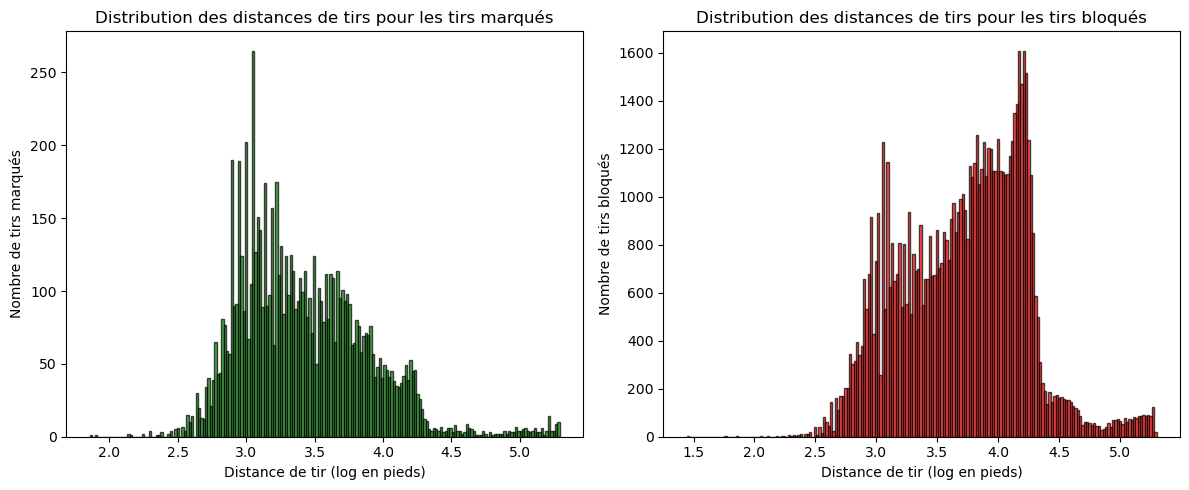

In [24]:
plot_shot_distance_histograms(df_2018)

In [29]:
is_goal_df_2018 = df_2018.query("is_goal == True")
no_goal_df_2018 = df_2018.query("is_goal == False")
moyenne_des_tirs_marqués = is_goal_df_2018["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2018["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

34.76508255609192
22.515654323470883


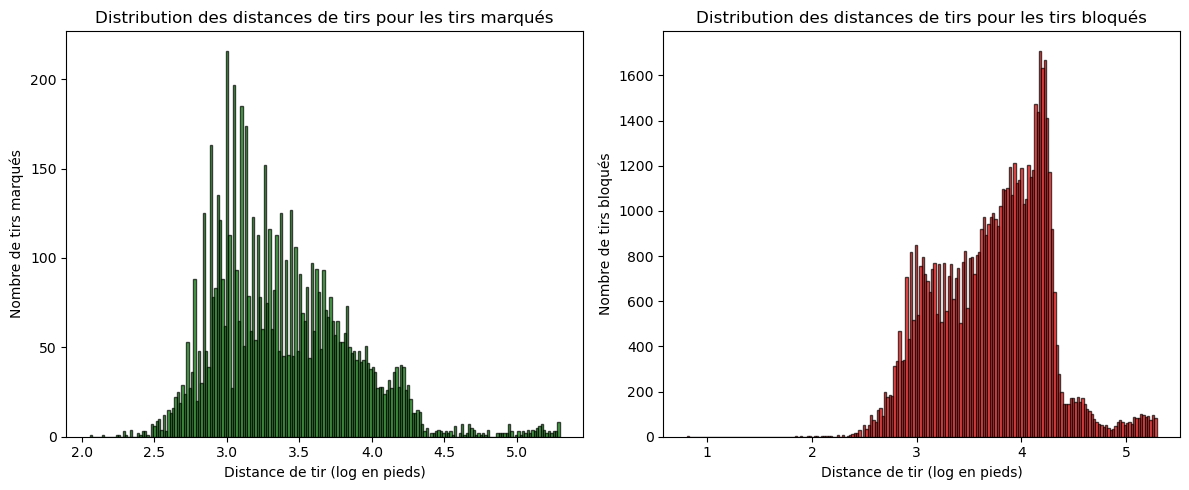

In [25]:
plot_shot_distance_histograms(df_2019)

In [31]:
is_goal_df_2019 = df_2019.query("is_goal == True")
no_goal_df_2019 = df_2019.query("is_goal == False")
moyenne_des_tirs_marqués = is_goal_df_2019["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2019["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

33.688239866032255
21.482915382770965


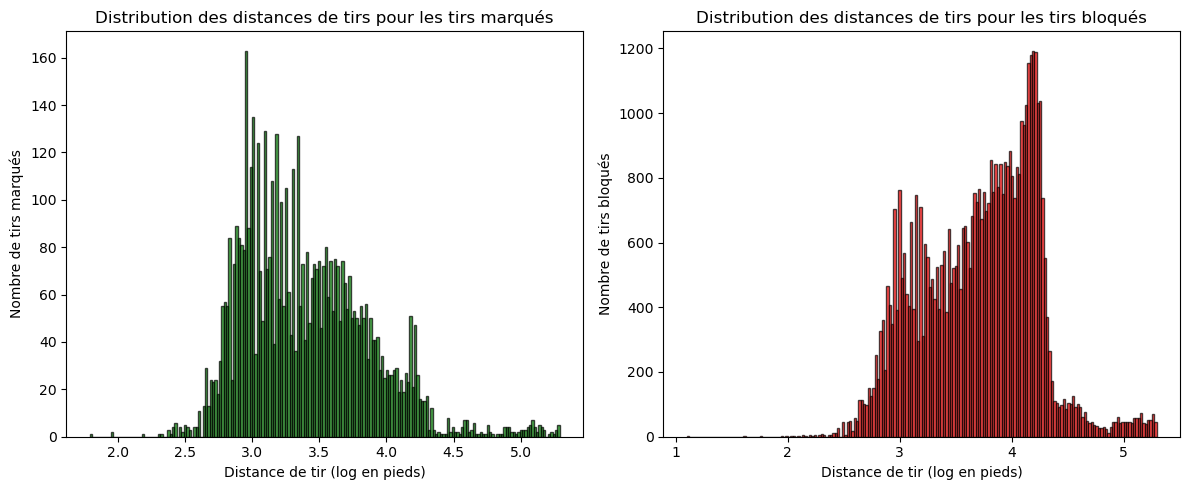

In [26]:
plot_shot_distance_histograms(df_2020)

In [32]:
is_goal_df_2020 = df_2020.query("is_goal == True")
no_goal_df_2020 = df_2020.query("is_goal == False")
moyenne_des_tirs_marqués = is_goal_df_2020["distance_de_tir"].mean()
ecart_type_des_tirs_marqués = is_goal_df_2020["distance_de_tir"].std()
print(moyenne_des_tirs_marqués)
print(ecart_type_des_tirs_marqués)

34.011324932961294
21.66042690997401


**Analyse et commentaires sur l'écolution au cours des trois saisons étudiées**

Comme on peut le voir les histogrammes en échelle logarithmique des distances de tirs marquées et ratés n'ont pas l'air de présenter des distributions différentes. Aussi de reconnaissance légère on peut voir que que les distributions des distances de tirs marquées semblent etre des lois normales avec des moyennes plutôt proche et des variance d'apparence pas très différentes.Pour confirmer cette hypothèse nous pourrions commencer par faire un test de normalité sur l'une de ces distributions et si elle savère normale nous feront des tests pour vérifier si les moyennes des distributions sont significativement distantes ou non. Ainsi nous saurons si ces données appartiennent à une meme distribution et dans ce cas évidement on conclurait qu'il n'y a pas eu dévolution significative au cours de ces trois dernières saisons

<h1>Question 2.)</h1>

**Nous avons choisir les données de la sainson 2017**

In [47]:
df_2017 = get_dataframe_from_concatenated_csv_files(2017)
df_2017.head(3)

,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,y_coord,event_owner_team_id,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
0,0,2017020065,2017-10-14,1,00:31,54,shot-on-goal,False,wrist,-55.0,-28.0,3,Rangers,home,False,Equal Strength,5v5,1551,8474090,8476234
1,1,2017020065,2017-10-14,1,00:42,55,shot-on-goal,False,wrist,-84.0,-15.0,3,Rangers,home,False,Equal Strength,5v5,1551,8476468,8476234
2,2,2017020065,2017-10-14,1,00:59,58,shot-on-goal,False,wrist,-49.0,-19.0,3,Rangers,home,False,Power Play,5v4,1451,8476459,8476234


In [48]:
df_2017 = pipeline_home_goalie_position_and_distance_de_tir(df_2017)
df_2017.head(3)

/tmp/ipykernel_6566/2633824581.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distance_de_tir"] = df.apply(distance_de_tir, axis=1)


,Unnamed: 0,game_id,game_date,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id,home_goalie_position_first_period,distance_de_tir
0,0,2017020065,2017-10-14,1,00:31,54,shot-on-goal,False,wrist,-55.0,...,Rangers,home,False,Equal Strength,5v5,1551,8474090,8476234,right,53.000000
1,1,2017020065,2017-10-14,1,00:42,55,shot-on-goal,False,wrist,-84.0,...,Rangers,home,False,Equal Strength,5v5,1551,8476468,8476234,right,21.931712
2,2,2017020065,2017-10-14,1,00:59,58,shot-on-goal,False,wrist,-49.0,...,Rangers,home,False,Power Play,5v4,1451,8476459,8476234,right,54.424259


/tmp/ipykernel_6566/3512967704.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped_2017 = df_2017.groupby(['distance_bins', 'shot_type']).agg(


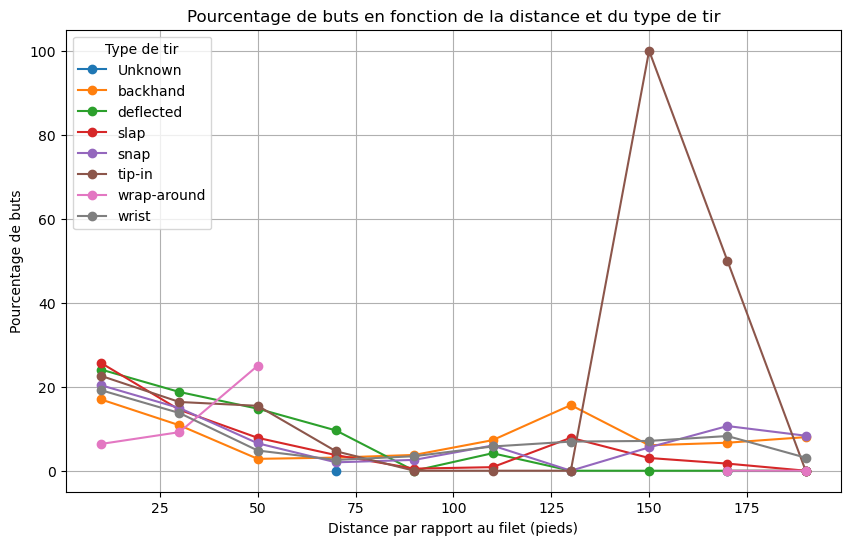

In [56]:
# Ajoutons une colonne de "distance_bins" pour classer les distances par intervalles (ici tous les 20 pieds)
df_2017['distance_bins'] = pd.cut(df_2017['distance_de_tir'], bins=np.arange(0, df_2017['distance_de_tir'].max() + 5, 20))

# Regroupons les données par distance et type de tirs, puis calculons les totaux et pourcentages de buts
data_grouped_2017 = df_2017.groupby(['distance_bins', 'shot_type']).agg(
    total_shots=('event_type', 'count'),
    total_goals=('is_goal', 'sum')
).reset_index()
data_grouped_2017['goal_percentage'] = (data_grouped_2017['total_goals'] / data_grouped_2017['total_shots']) * 100

# Traçons le graphique
plt.figure(figsize=(10, 6))
for shot_type in data_grouped_2017['shot_type'].unique():
    subset = data_grouped_2017[data_grouped_2017['shot_type'] == shot_type]
    plt.plot(subset['distance_bins'].apply(lambda x: x.mid), subset['goal_percentage'], marker='o', label=shot_type)

plt.xlabel('Distance par rapport au filet (pieds)')
plt.ylabel('Pourcentage de buts')
plt.title("Pourcentage de buts en fonction de la distance et du type de tir")
plt.legend(title='Type de tir')
plt.grid(True)
plt.show()



<h1>Interpretations et commantaire et conclusion</h1>

Comme on peut le voir ce graphique est très parlant car il montre le succès de chque type de tirs en fonction de la distance au filet. En effet jusqu'à moins de 75 pieds le tir qui conserve le meilleur succès serait le deflected, ensuite 80 et 130 pieds le backhand est plutôt meilleur avec un meilleurs pourcentage de succès et enfin au delà de 130 pieds le Tip-in est incroyablement concluant car il semble marcher à tous les coups et celà suscite un doute quand à la pertinence de ce résultat. Ne serait-ce pas parcequ'on a très peu de tirs de type Tip-in qui ont quand meme presque tous finir pas etre un but par hasard qu'on a ce résultat ? Et si il y avait beaucoup plus de tir de ce type n'est ce pas possible que le pourcentage de réussite soit revu à la baisse ? Ne s'agirait-il pas d'un biais dû au manque de données. On pourrait commencer une analyse simple en comparant le pourcentage de tir de ce type aux autres types de Tirs.